In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("bankloan.csv")
df=df.drop(["ID"],axis=1)
df.shape

(5000, 13)

In [3]:
df.head()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.size

65000

In [5]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIP.Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

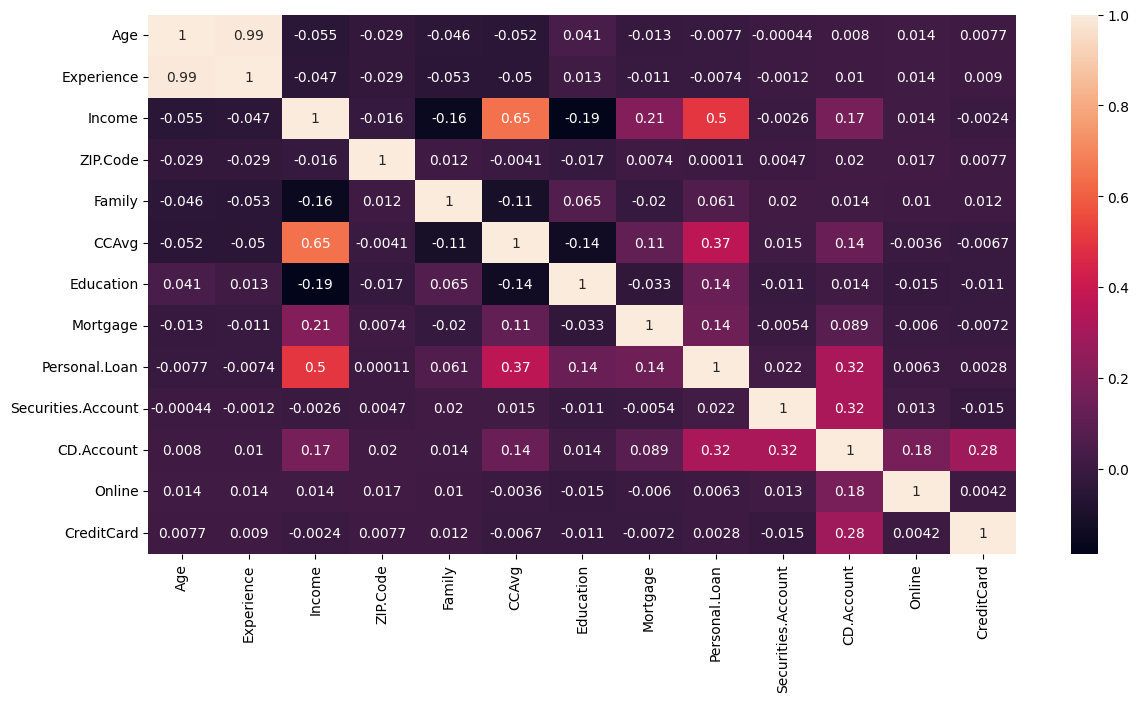

In [8]:
cor=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

In [9]:
df__0=df[df["Personal.Loan"]==0]
df_1=df[df["Personal.Loan"]==1]
print(f'The number of people got the loan are {len(df_1)}')
print(f'The number of people not got the loan are {len(df__0)}')
df_0=df__0.sample(n=500,random_state=42)
df_final=pd.concat([df_0,df_1],axis=0)
print()
print("After balancing the data")
print(f'The number of people got the loan are {len(df_1)}')
print(f'The number of people not got the loan are {len(df_0)}')

The number of people got the loan are 480
The number of people not got the loan are 4520

After balancing the data
The number of people got the loan are 480
The number of people not got the loan are 500


**Data was imbalances so we have balanced the data by randomly select the instances for people who didn't get the loan.**

<Axes: >

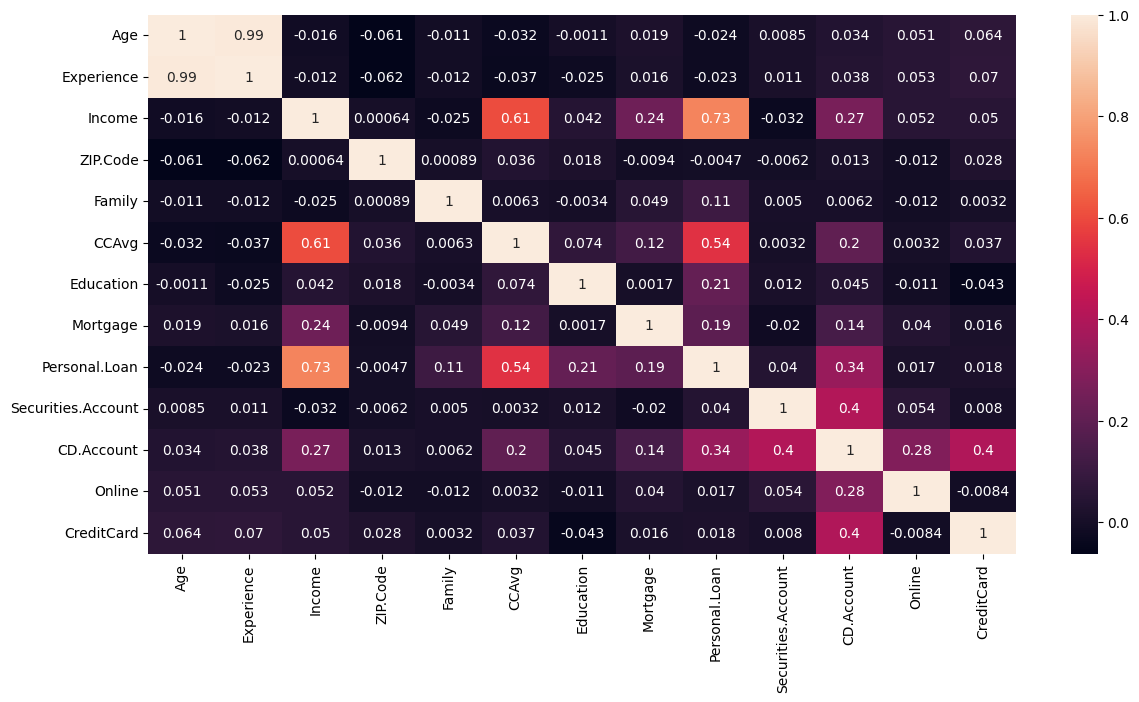

In [10]:
corr=df_final.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)

1. **We have dropped "Experience","Zip code","Online Banking" and "Credit card"
features due to very low correlation with target variable.**

In [11]:
df=df_final.drop(["Experience","ZIP.Code","Online","CreditCard"],axis=1)
df=df.reset_index(drop=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account
0,61,49,4,1.7,2,185,0,0,0
1,44,154,2,8.8,1,0,0,0,0
2,44,30,1,0.5,3,0,0,0,0
3,33,78,3,0.6,2,0,0,0,0
4,58,25,4,0.9,2,90,0,0,0


<Axes: >

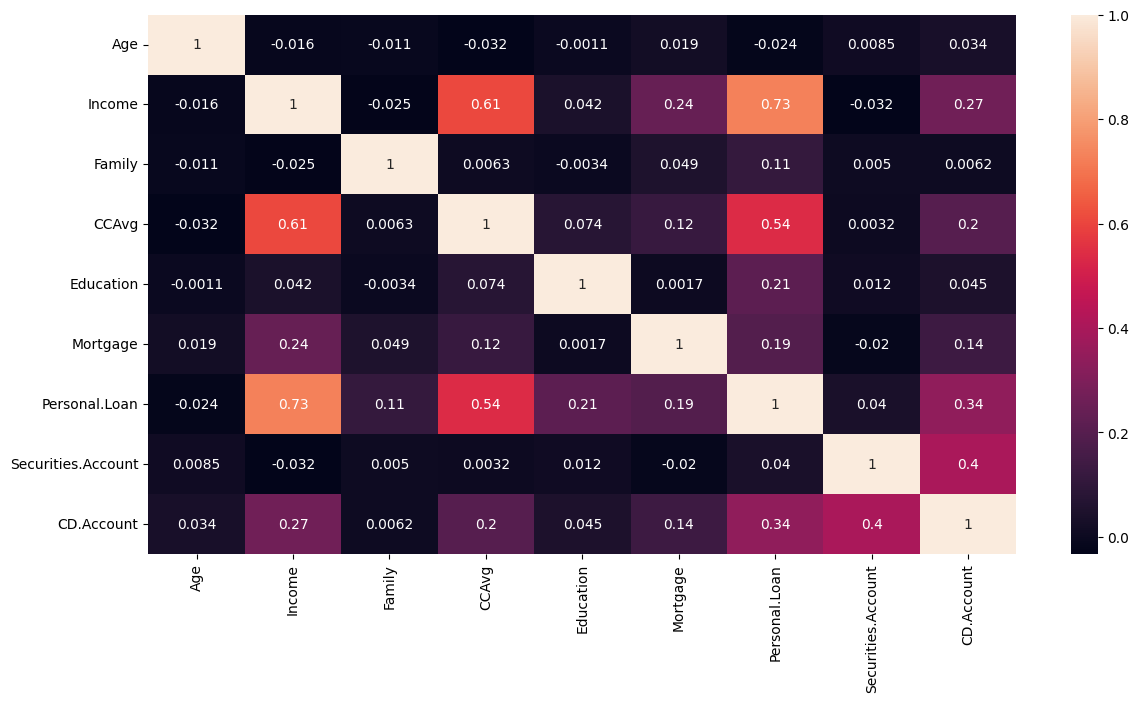

In [12]:
cor=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

<Axes: >

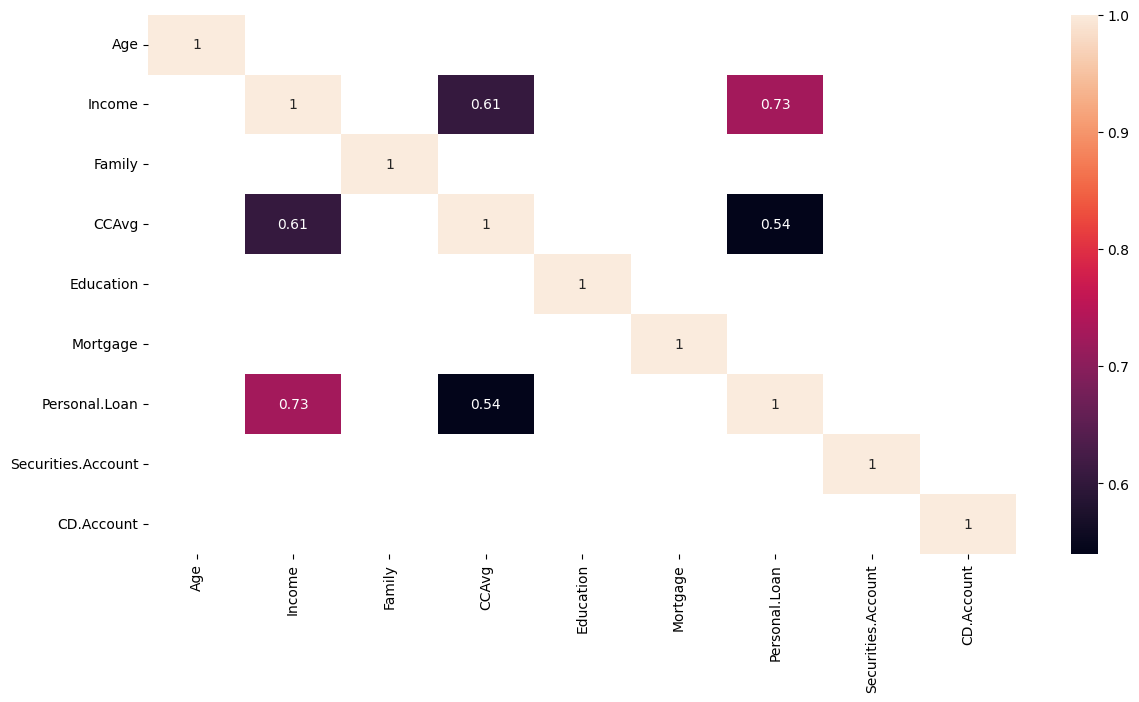

In [13]:
cor=df.corr()
df_cor=cor.copy()
for i in cor.columns:
  df_cor[i]=np.where((cor[i]>=.50) | (cor[i]<=-0.50),cor[i],np.nan)


plt.figure(figsize=(14,7))
sns.heatmap(df_cor,annot=True)

1. **Personal loan is highly correlated with income and CC Avg,**
2. **CCavg and Income has high multicolinearity.**

In [14]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal.Loan', 'Securities.Account', 'CD.Account'],
      dtype='object')

In [15]:
skewness={}
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  val=df[i].skew()
  skewness[i]=val

pd.DataFrame([skewness])

,Age,Income,CCAvg,Mortgage
0,-0.016844,-0.03254,0.861318,1.911517


**"Age" and "Income" features are Normally distributed while, "CCavg" and "Mortage" are Right skewed**

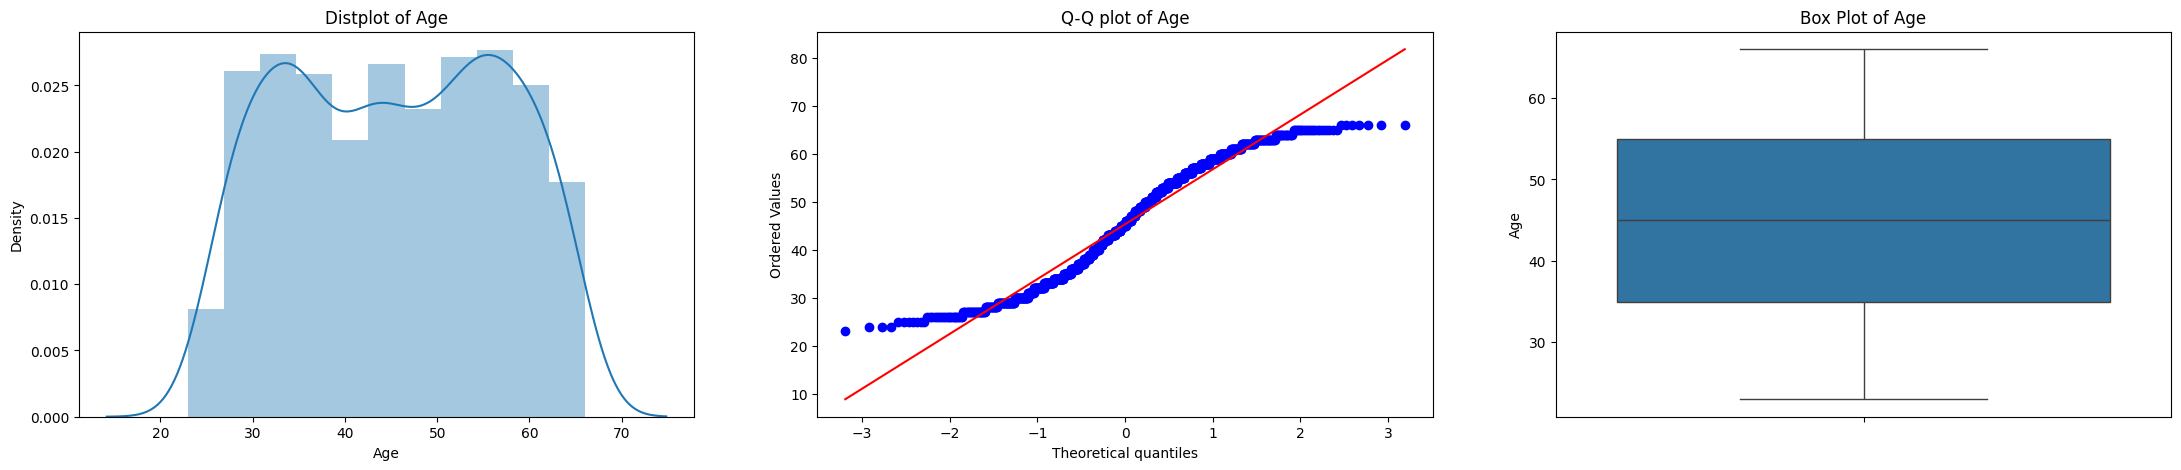

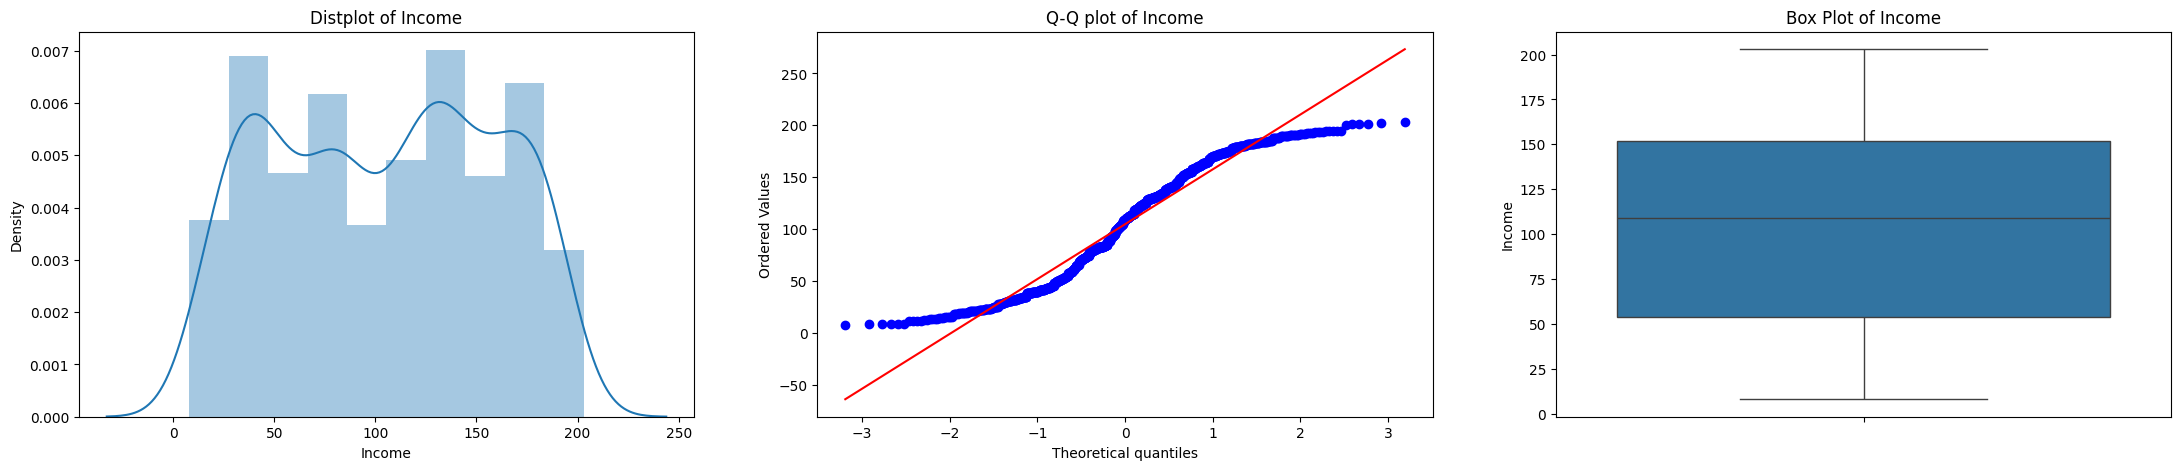

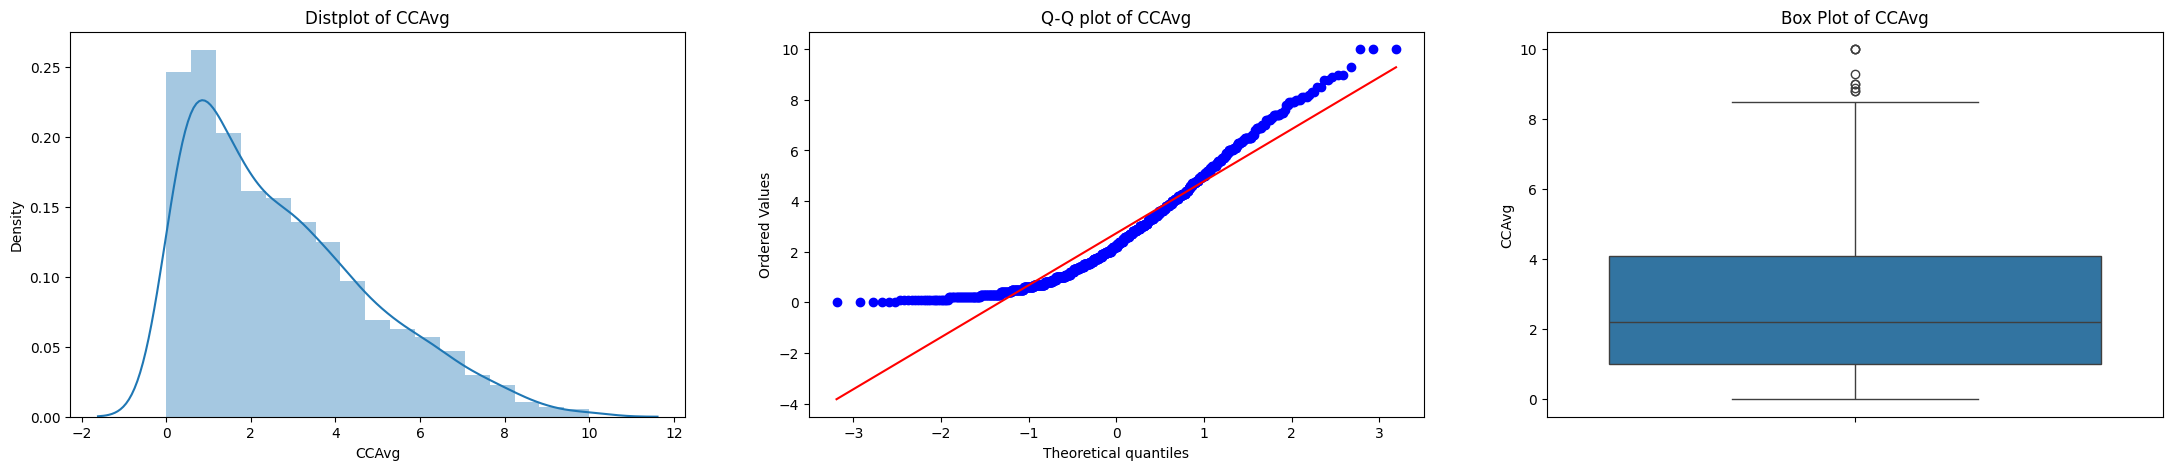

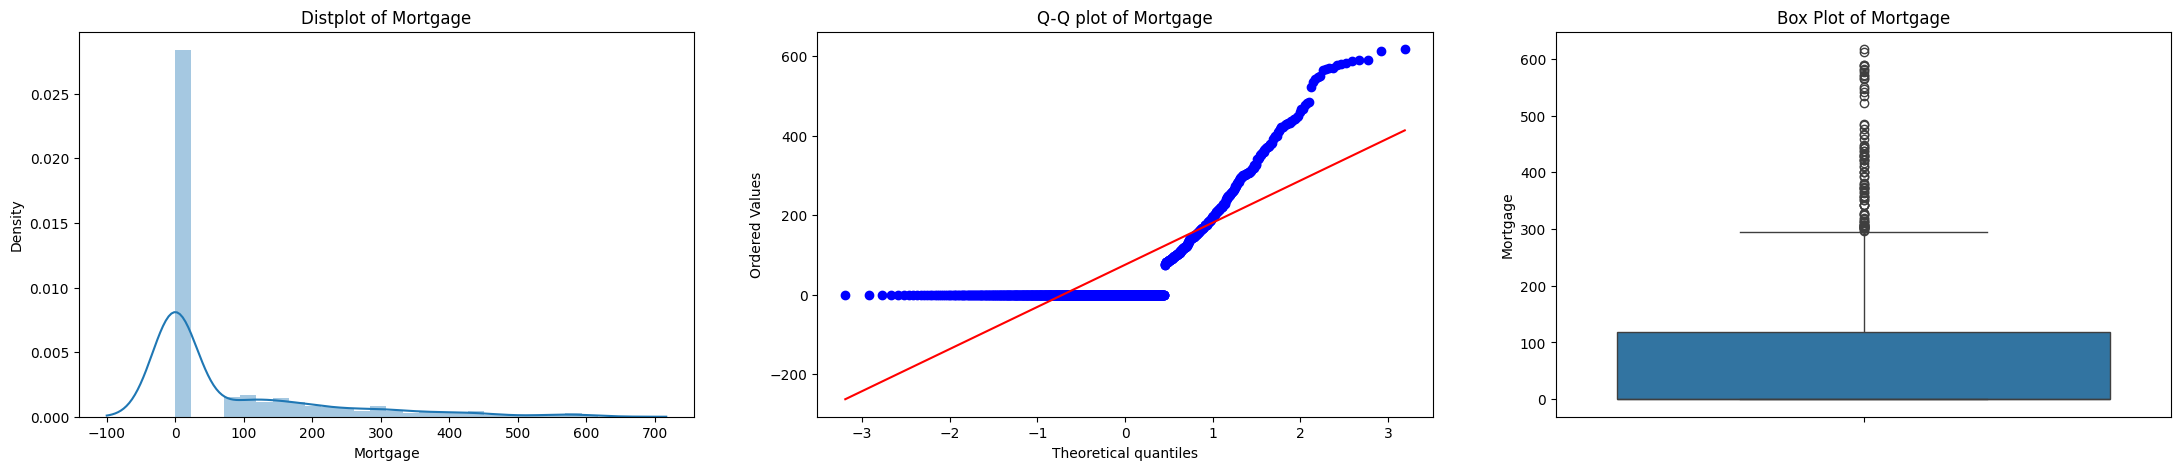

In [16]:
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  plt.figure(figsize=(27,5))
  plt.subplot(131)
  sns.distplot(df[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(132)
  sts.probplot(df[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")
  plt.subplot(133)
  sns.boxplot(df[i])
  plt.title(f"Box Plot of {i}")

  plt.show()

**"CCAvg" and "Mortage" features consists outliers**

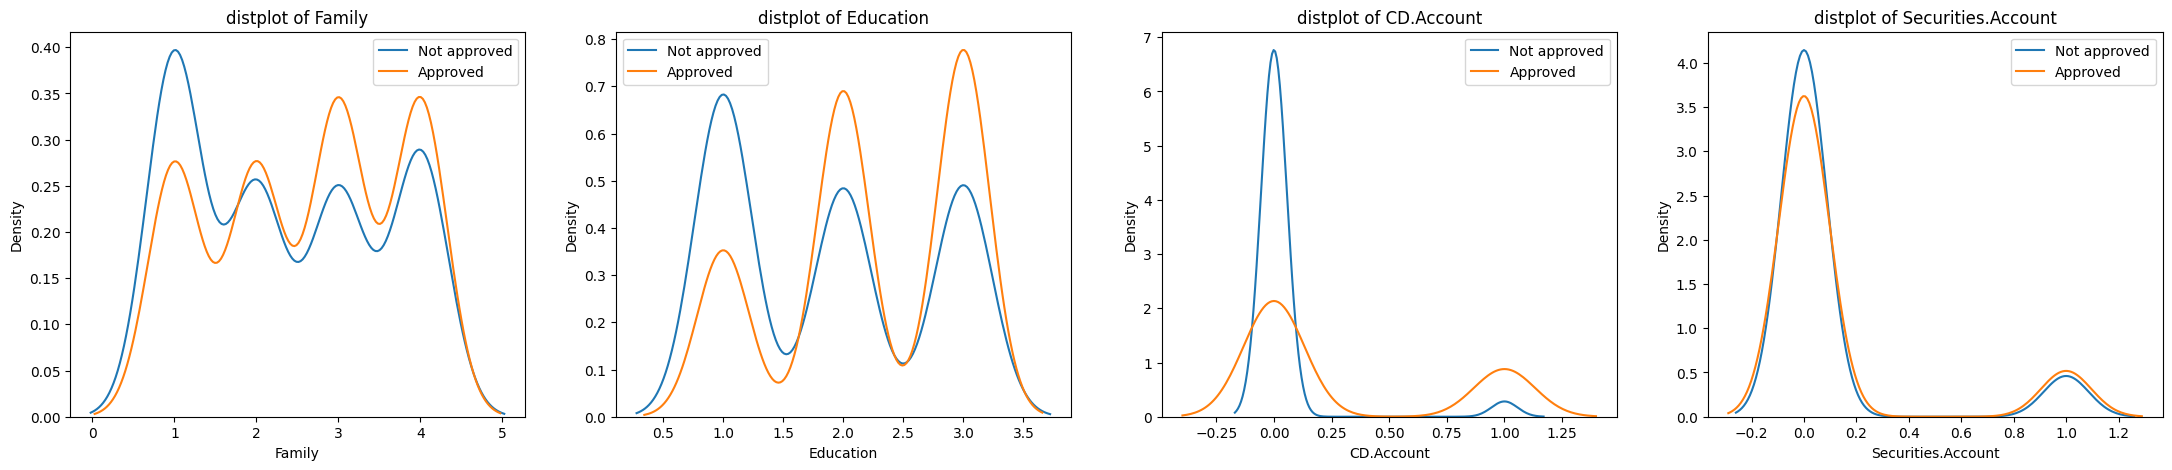

In [17]:
plt.figure(figsize=(27,5))
plt.subplot(141)
sns.distplot(df[df["Personal.Loan"]==0]["Family"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["Family"],label="Approved",hist=False)
plt.legend()
plt.title("distplot of Family")

plt.subplot(142)
sns.distplot(df[df["Personal.Loan"]==0]["Education"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["Education"],label="Approved",hist=False)
plt.legend()
plt.title("distplot of Education")

plt.subplot(143)
sns.distplot(df[df["Personal.Loan"]==0]["CD.Account"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["CD.Account"],label="Approved",hist=False)
plt.legend()
plt.title("distplot of CD.Account")

plt.subplot(144)
sns.distplot(df[df["Personal.Loan"]==0]["Securities.Account"],label="Not approved",hist=False)
sns.distplot(df[df["Personal.Loan"]==1]["Securities.Account"],label="Approved",hist=False)
plt.legend()
_=plt.title("distplot of Securities.Account")


1. **Person with family members 1 is most likely to get disapproval for loan.**
2. **Highly educated persons are most likely to get loan.**
3.  **Person with CD account are most likely to get loan.**
4. **Person without Security account are likely to get disapproval for loan.**

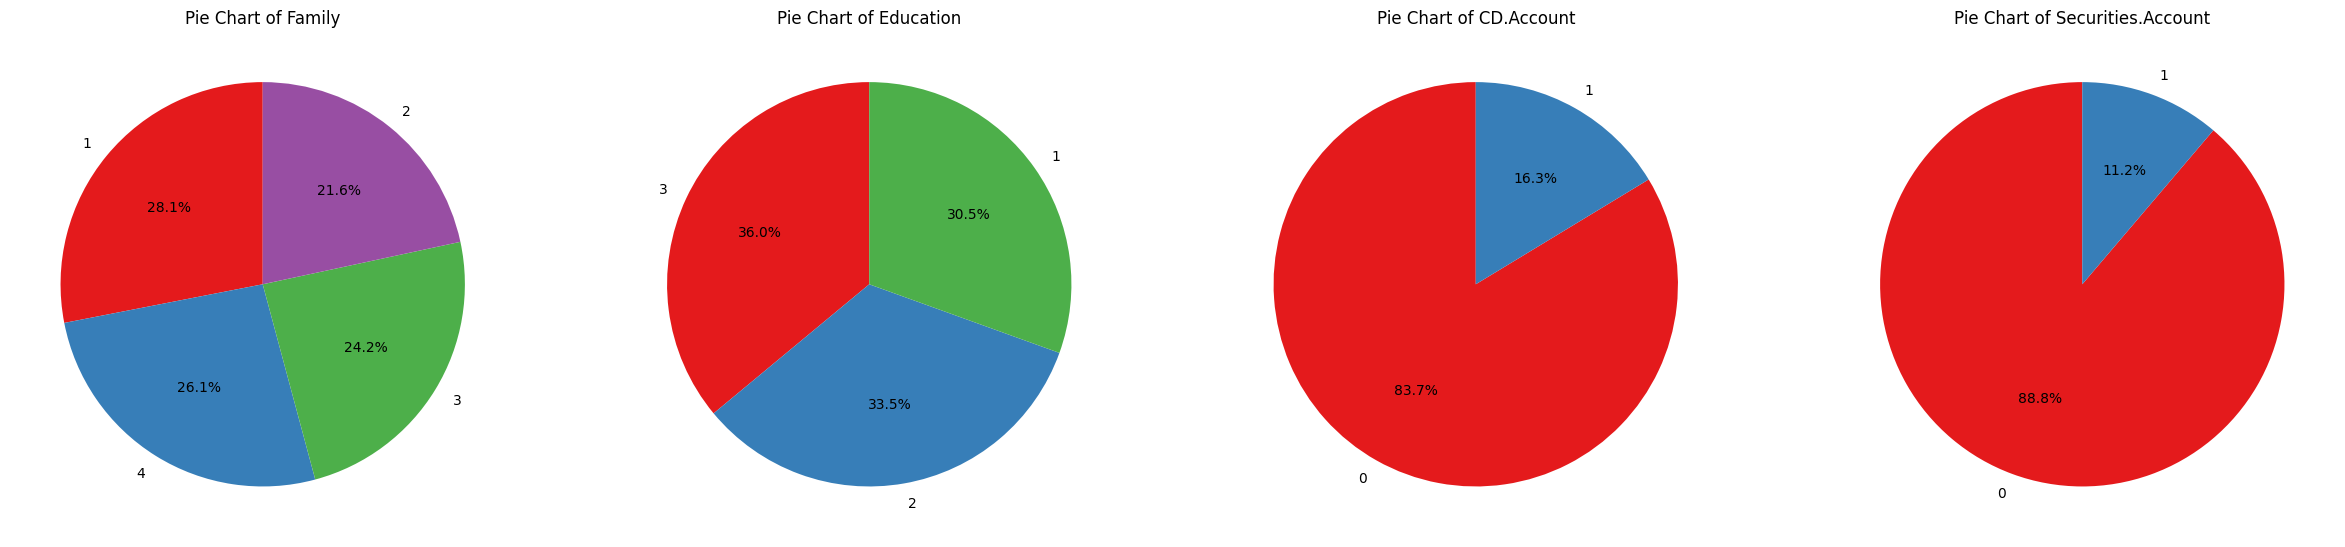

In [18]:
cat_count_Family=df["Family"].value_counts()
cat_count_Education=df["Education"].value_counts()
cat_count_CDAcc=df["CD.Account"].value_counts()
cat_count_SecurityACC=df["Securities.Account"].value_counts()


cat_list=[cat_count_Family,cat_count_Education,cat_count_CDAcc,cat_count_SecurityACC]
plt.figure(figsize=(30,8))
plt.subplot(141)
_=plt.pie(cat_list[0],labels=cat_list[0].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of Family")

plt.subplot(142)
_=plt.pie(cat_list[1],labels=cat_list[1].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of Education")

plt.subplot(143)
_=plt.pie(cat_list[2],labels=cat_list[2].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
plt.title(f"Pie Chart of CD.Account")

plt.subplot(144)
_=plt.pie(cat_list[3],labels=cat_list[3].index,autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1", len(cat_list[0])))
_=plt.title(f"Pie Chart of Securities.Account")

**Here, we can see the distribution of Family, Education,CD Account,Security Accounts**
1. There are most of the people without CD account and Security Accounts.

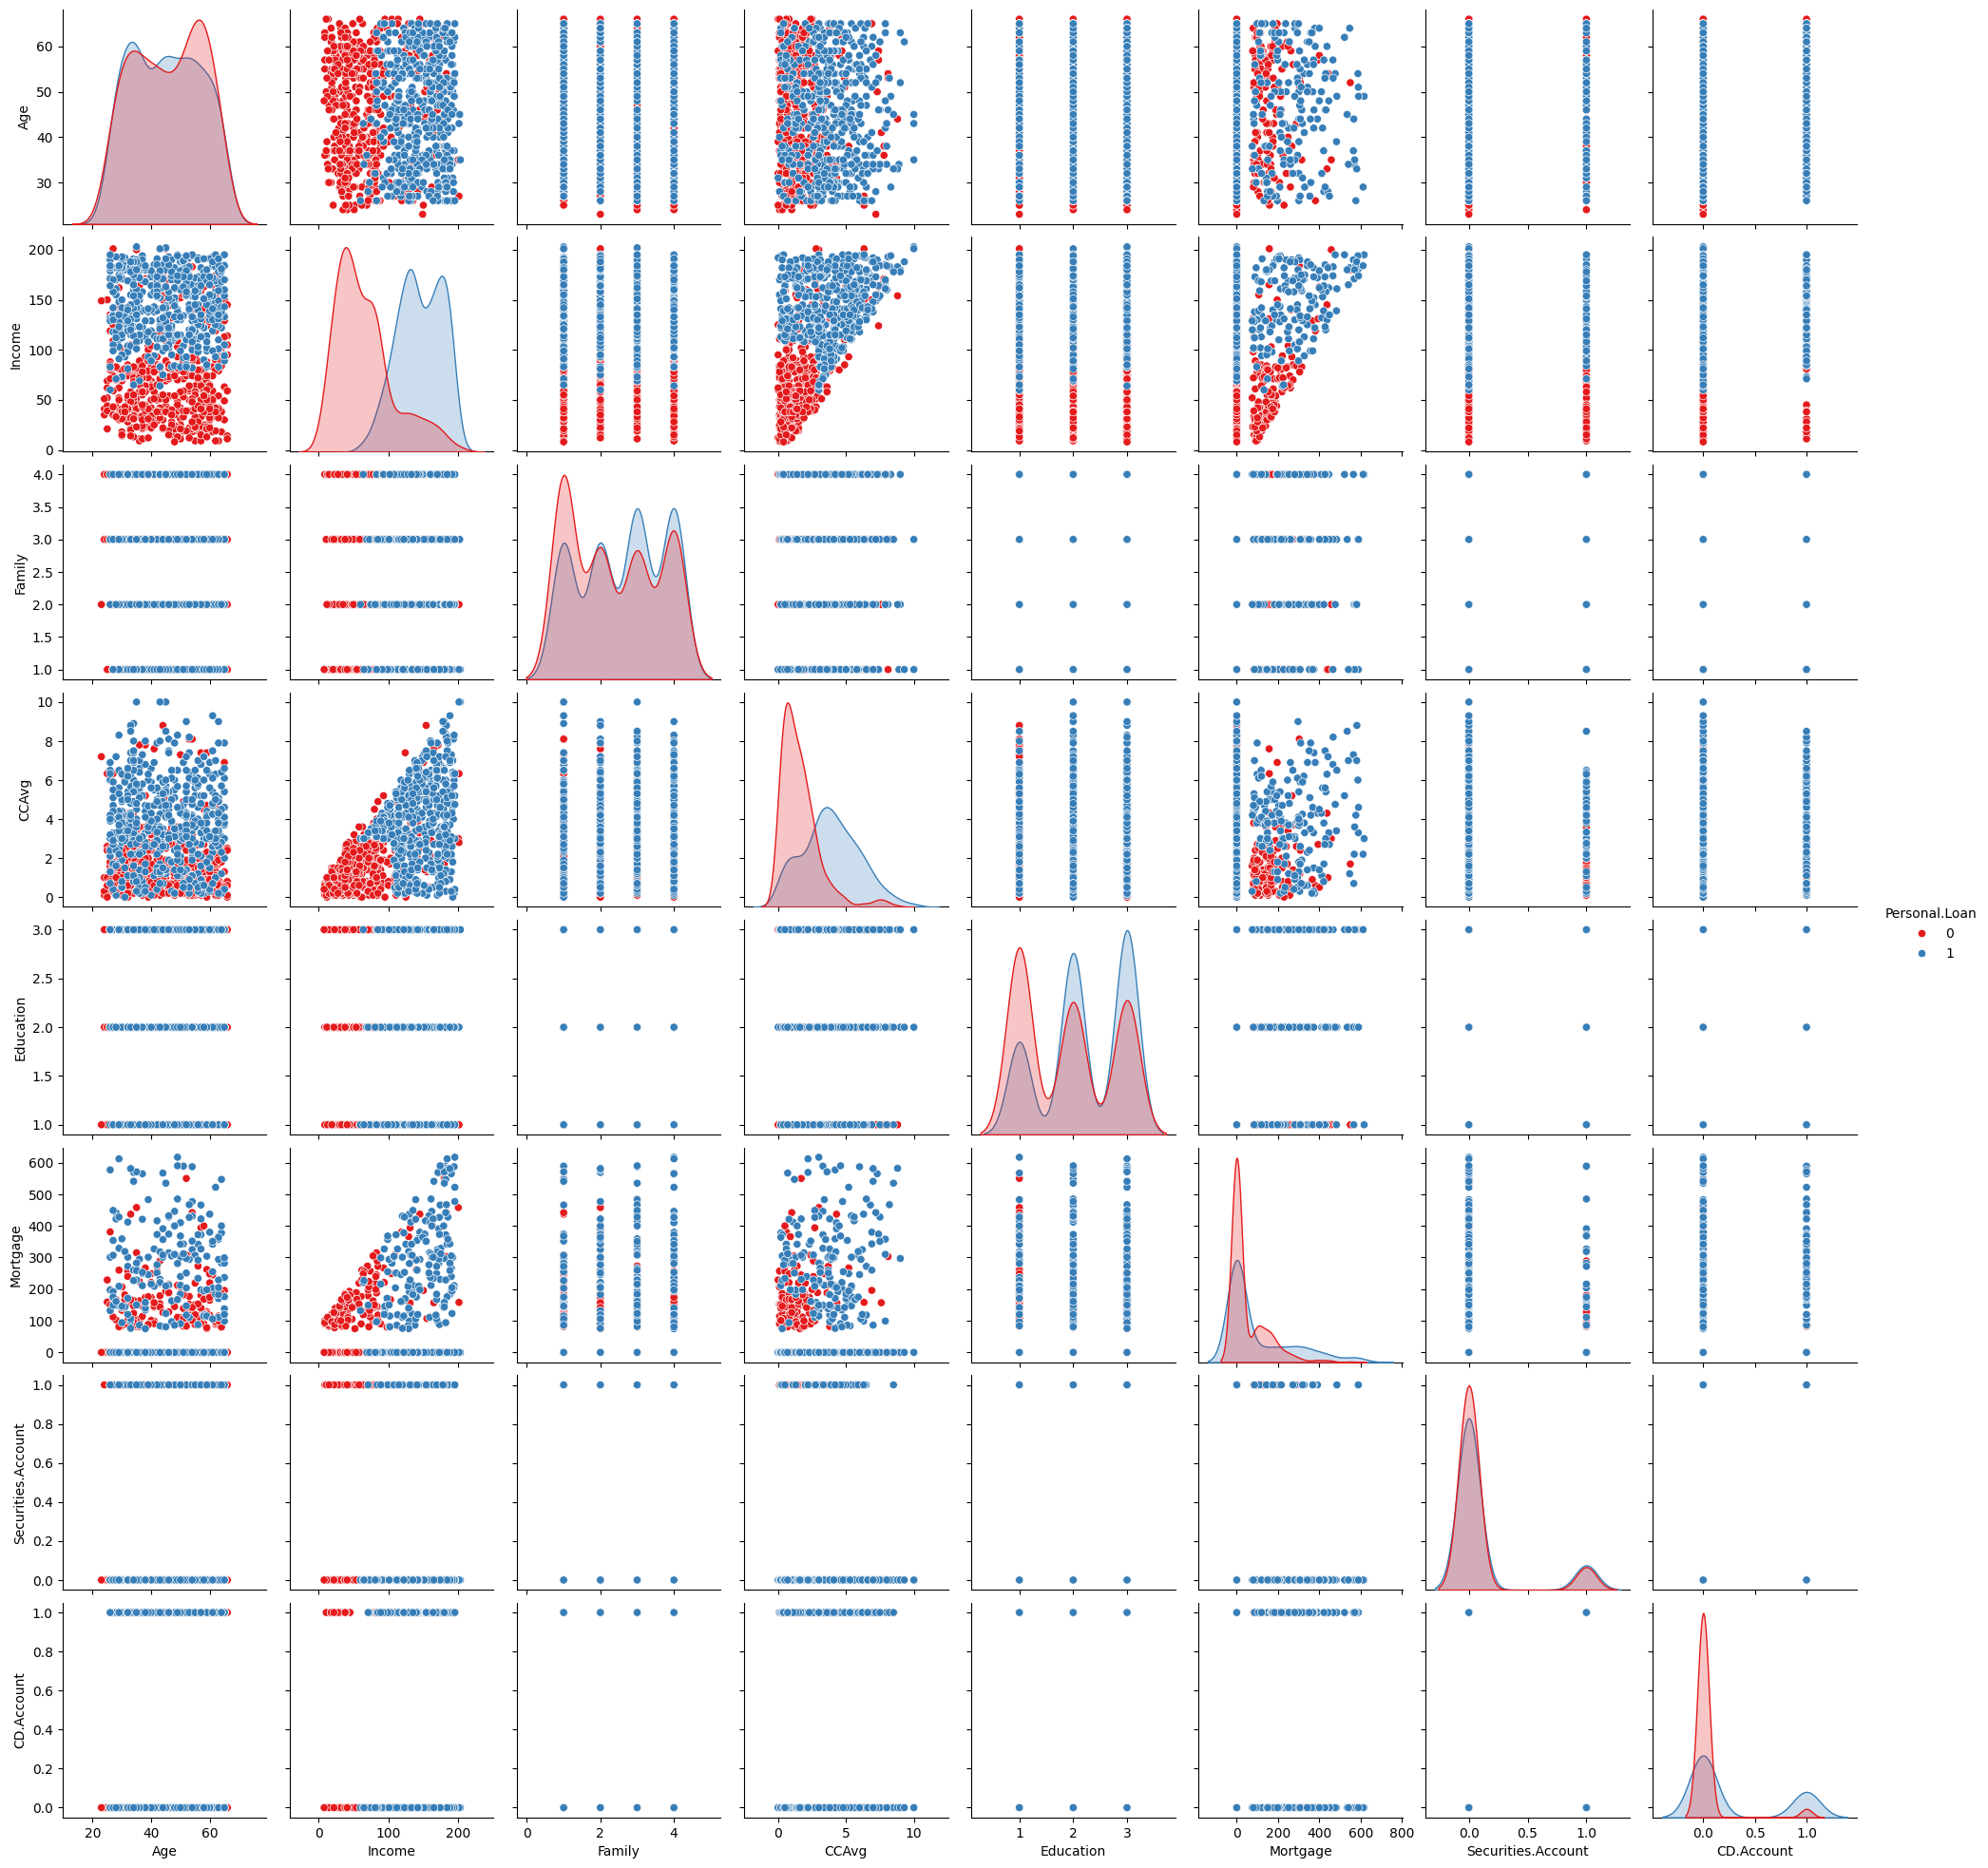

In [22]:
sns.pairplot(df,hue="Personal.Loan",palette="Set1")

**People with high income, CC Avg, Mortage and Eduction level are most likely to get a Personal loan**

In [23]:
# from ydata_profiling import ProfileReport
# prof=ProfileReport(df)
# prof.to_file(output_file="bankloan.html")

In [24]:
df_num_col=df.select_dtypes(include="number").columns
def outliers(df, df_num_col):
    lower_lim = []
    upper_lim = []
    outlier_num = []
    for col in df_num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_lim = round((Q1 - 1.5 * IQR), 0)
        Upper_lim = round((Q3 + 1.5 * IQR), 0)
        lower_lim.append(Lower_lim)
        upper_lim.append(Upper_lim)
        outliers_in_column = df[(df[col] < Lower_lim) | (df[col] > Upper_lim)]
        outlier_num.append(len(outliers_in_column))
    outlier_df = pd.DataFrame({
        'Column': df_num_col,
        'Lower Limit': lower_lim,
        'Upper Limit': upper_lim,
        'No of Outliers': outlier_num
    })

    return outlier_df



outliers(df,df_num_col)

,Column,Lower Limit,Upper Limit,No of Outliers
0,Age,5.0,85.0,0
1,Income,-93.0,299.0,0
2,Family,-4.0,8.0,0
3,CCAvg,-4.0,9.0,4
4,Education,-2.0,6.0,0
5,Mortgage,-177.0,296.0,90
6,Personal.Loan,-2.0,2.0,0
7,Securities.Account,0.0,0.0,110
8,CD.Account,0.0,0.0,160


In [25]:
for i in df_num_col[3:6]:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR
  filt_df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]


outliers(filt_df,df_num_col)

,Column,Lower Limit,Upper Limit,No of Outliers
0,Age,4.0,87.0,0
1,Income,-86.0,278.0,0
2,Family,-4.0,8.0,0
3,CCAvg,-4.0,8.0,12
4,Education,-2.0,6.0,0
5,Mortgage,-123.0,204.0,58
6,Personal.Loan,-2.0,2.0,0
7,Securities.Account,0.0,0.0,102
8,CD.Account,0.0,0.0,131


**After applying IQR method for trimming outliers we still have the outlers in data, therefore we will perform function transformation to get rid of outliers.**

In [26]:
filt_df.isnull().sum()

,0
Age,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0
CD.Account,0


In [27]:
x=filt_df.drop(["Personal.Loan"],axis=1)
y=filt_df["Personal.Loan"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"The shape of X_train is {X_train.shape}\n The shape of X_test is {X_test.shape}\n The shape of Y_train is {Y_train.shape} \n The shape of Y_test is {Y_test.shape}")

The shape of X_train is (712, 8)
 The shape of X_test is (178, 8)
 The shape of Y_train is (712,) 
 The shape of Y_test is (178,)


In [28]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)
X_train_trans=X_train
X_test_trans=X_test
X_train_trans["Mortgage"]=trf.fit_transform(X_train["Mortgage"])
X_test_trans["Mortgage"]=trf.transform(X_test["Mortgage"])
X_train_trans.head()
outliers(X_train_trans,df_num_col[0:6])

,Column,Lower Limit,Upper Limit,No of Outliers
0,Age,4.0,88.0,0
1,Income,-84.0,276.0,0
2,Family,-4.0,8.0,0
3,CCAvg,-4.0,8.0,10
4,Education,-2.0,6.0,0
5,Mortgage,-7.0,11.0,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
X_train_scaled.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account
0,0.724562,0.224560,-1.281433,-0.750149,-0.071130,-0.590176,-0.358284,-0.427463
1,0.294368,-1.142969,0.446560,-0.361528,-0.071130,-0.590176,-0.358284,-0.427463
2,-0.996213,-0.839073,1.310556,-0.312950,-0.071130,1.680094,-0.358284,-0.427463
3,1.240795,1.250207,0.446560,1.435844,-1.306365,-0.590176,-0.358284,-0.427463
4,-1.082251,1.307188,0.446560,1.469849,-0.071130,-0.590176,2.791079,2.339386


In [30]:
skewness={}
for i in df.columns[0:2].append(df.columns[3:4].append(df.columns[5:6])):
  val=X_train_trans[i].skew()
  skewness[i]=val

pd.DataFrame([skewness])

,Age,Income,CCAvg,Mortgage
0,-0.035645,0.07638,0.874462,1.124277


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
para={"n_estimators":[10,20,30,40,50],"max_depth":[10,20,30],"max_features":["auto","log2"]}
model_rf=RandomForestClassifier()
clf=GridSearchCV(model_rf,para,cv=5)
clf.fit(X_train_trans,Y_train)
best_para=clf.best_params_
best_score=round(clf.best_score_,3)
print(f'The Best paramter are {best_para}\n The best Score is {best_score*100}%')

The Best paramter are {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 50}
 The best Score is 97.5%


In [32]:
trans_model=RandomForestClassifier(max_depth=30,max_features="log2",n_estimators=30,random_state=42)
trans_model.fit(X_train_trans,Y_train)
y_pred=trans_model.predict(X_test_trans)

In [33]:
score=round(trans_model.score(X_test_trans,Y_test),3)
print(f'Accuracy is {score*100}%')

Accuracy is 96.1%


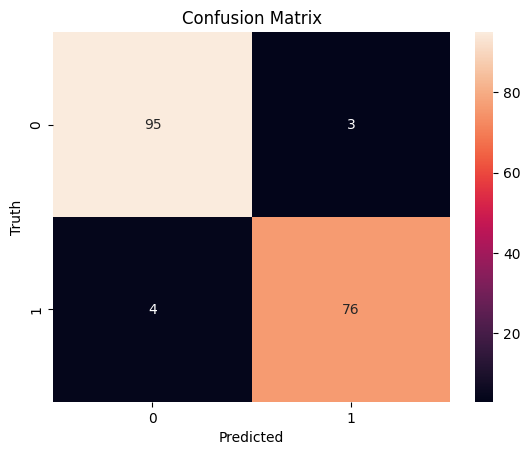

In [38]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(Y_test,y_pred)
sns.heatmap(con,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
_=plt.ylabel("Truth")

In [39]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        98
           1       0.96      0.95      0.96        80

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

